### This python program is used to track the price fluctuation  of a particular product in amazon website.

In [1]:
import requests #ver:2.24.0 
from bs4 import BeautifulSoup #ver:4.9.1 
import smtplib
import csv
import datetime
import os

In [2]:
url = 'https://www.amazon.in/HP-Processor-Windows-Natural-14s-dq2535TU/dp/B0928NL6F3/ref=sr_1_3?crid=TDQZ7CVY7YP0&dchild=1&keywords=hpt+14+2021+11th+gen+intel+core+i5+laptop&qid=1635607127&sprefix=hp+14+2021+11th+gen+intel+core+i5+laptop%2Caps%2C273&sr=8-3'

In [6]:
#google 'my user agent'
#my user agent = Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}

def check_lappy_price():

    page = requests.get(url, headers=headers)

    bs = BeautifulSoup(page.content, 'html5lib')
    #print(bs.prettify().encode("utf-8"), "\n")
    
    
    product_title = bs.find(id = "productTitle").get_text()
    print("product_title------->",product_title.strip())

    try:
        price = bs.find(id = "jewelryPriceBreakup_feature_div").get_text()
    except:
        print("Amazon has updated the span id , this won't work")
                
    try:
        price = bs.find(id = "priceblock_dealprice").get_text()
    except:
        print("Amazon has updated the span id, this id won't work")
        
    
    #id=priceblock_ourprice or id=priceblock_dealprice, jewelryPriceBreakup_feature_div
    #note: id keeps changing based on offer
    #print(price)
    
    
    price = price[1:7]

    price_float =  float(price.replace(",",""))
    print("\n Today's price is------>",price_float)
    file_exist = True

    if not os.path.exists("./lappy_price.csv"):
        file_exist = False
        
    with open("lappy_price.csv","a") as file:
            writer = csv.writer(file, lineterminator='\n')
            #fields = ["Timestamp", "Price"]
            #writer.writerow(fields)
            
            if not file_exist:
                write.writerow(fields)
            
            timestamp = f"{datetime.datetime.date(datetime.datetime.now())}, {datetime.datetime.time(datetime.datetime.now())}"
            # info on new 'f' string: https://realpython.com/python-f-strings/
            writer.writerow([timestamp, price_float])
            
            print("\n ***** Wrote data in to file on *****",datetime.datetime.now())
    
    return price_float



while True:
    
    price = check_lappy_price()
    if(price < 50000):
        #send_email() current;y this feature on HOLD
        print("Laptop now is under my 50k budget \n")
        break
    else:
        print("***** I need to wait for few more days ***** \n")
        break
    time.sleep(10)    
    

product_title-------> HP 14 11th Gen Intel Core i5 Processor 14 inches HD Laptop, 8GB/512GB SSD/Windows 10/MS Office (Natural Silver/1.46Kg), 14s-dq2535TU
Amazon has updated the span id, this id won't work


ValueError: could not convert string to float: ''

type of the df is :  <class 'pandas.core.frame.DataFrame'>
content of the sheet: 
                       Timestamp    Price
69  2021-12-17, 09:10:02.611883  55990.0
70  2021-12-18, 10:37:49.705439  55990.0
71  2021-12-19, 19:19:19.622938  57990.0
72  2021-12-20, 09:58:50.622938  57990.0
73  2021-12-20, 23:04:37.900070  57990.0


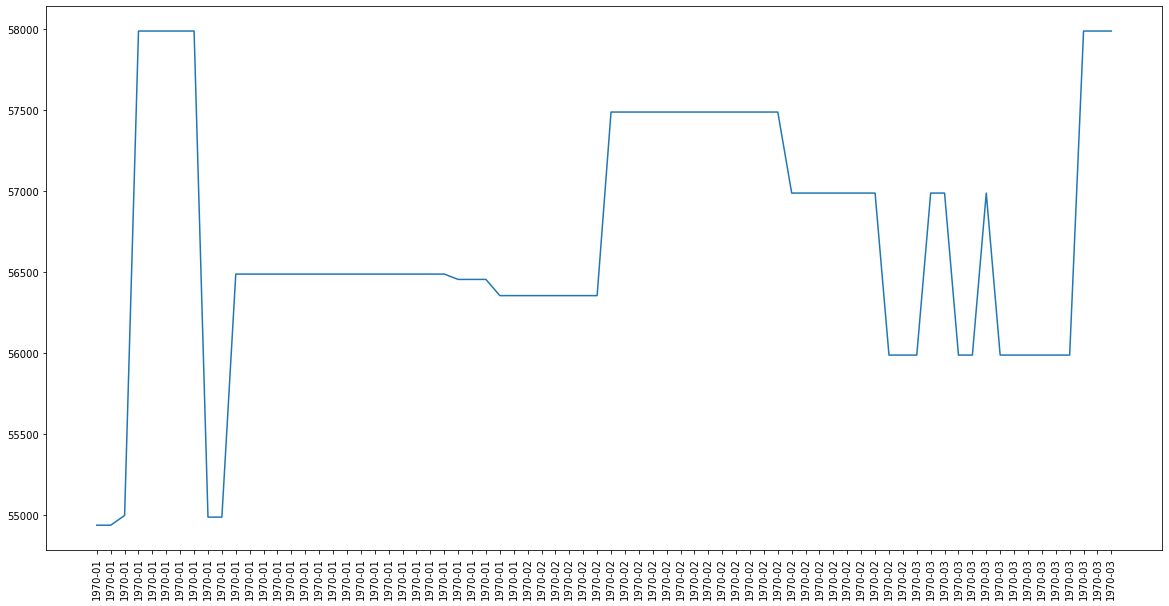

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
#from IPython .display import clear_output

df = pd.read_csv("lappy_price.csv")
print("type of the df is : ", type(df)) #file type is Dataframe

df.drop_duplicates(subset = ['Timestamp'])
print("content of the sheet: \n", df.tail())

#x = df['Timestamp']
#y = df['Price']

plt.rcParams['figure.figsize']=20,10

#plt.plot(x,y)
#plt.plot(df.Timestamp, df.Price)
#plt.show()

fig, ax = plt.subplots()
ax.plot(df.Timestamp, df.Price)
ax.set_xticks(df.Timestamp)


ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_ = plt.xticks(rotation=90)    

